 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [368]:
# Initial imports
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [369]:
# Reading whale returns
whale_returns = pd.read_csv("Resources/whale_returns.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.sort_index(inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [370]:
# Count nulls
whale_returns.isnull().count()

SOROS FUND MANAGEMENT LLC      1060
PAULSON & CO.INC.              1060
TIGER GLOBAL MANAGEMENT LLC    1060
BERKSHIRE HATHAWAY INC         1060
dtype: int64

In [371]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [372]:
# Reading algorithmic returns
algo_returns = pd.read_csv("Resources/algo_returns.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [373]:
# Count nulls
algo_returns.isnull().count()

Algo 1    1241
Algo 2    1241
dtype: int64

In [374]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [375]:
# Reading S&P 500 Closing Prices
sp500_history = pd.read_csv("Resources/sp500_history.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history.sort_index(inplace = True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [376]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [377]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$", " ", regex=True).astype(float)
sp500_history.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [378]:
# Calculate Daily Returns
sp500_returns = sp500_history.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [379]:
# Drop nulls
sp500_returns.dropna(inplace=True)
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [380]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.columns = ["S&P 500"]
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [381]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis=1, join='inner')
portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

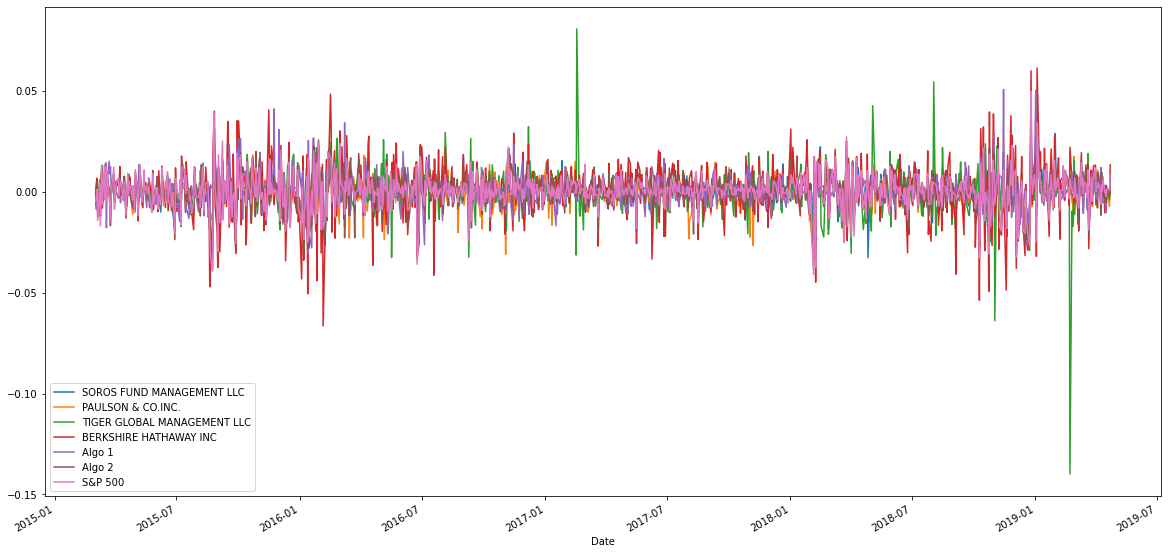

In [382]:
# Plot daily returns of all portfolios
portfolio_returns.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

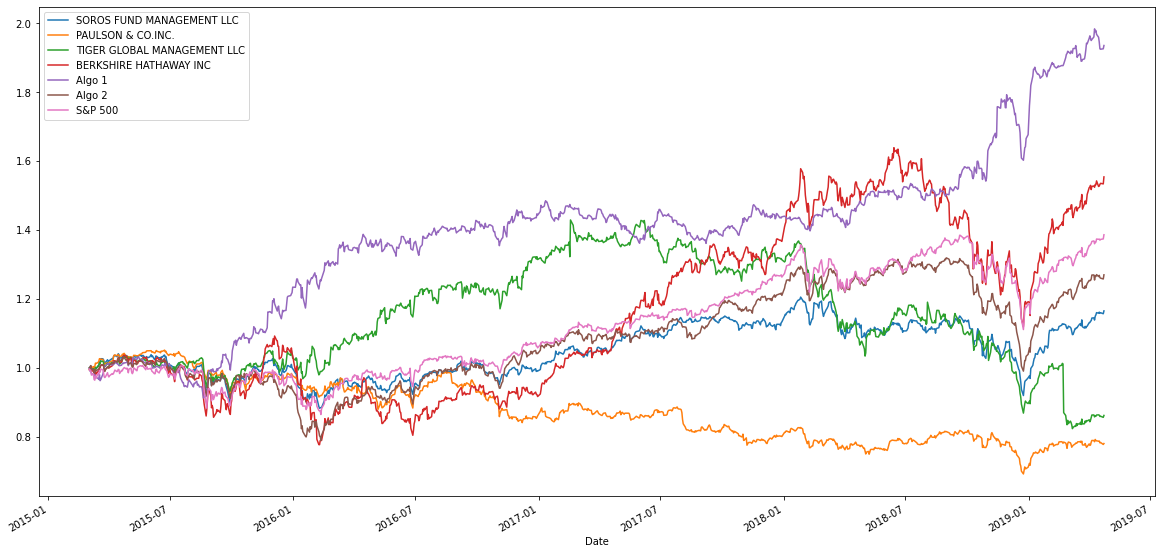

In [383]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + portfolio_returns).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

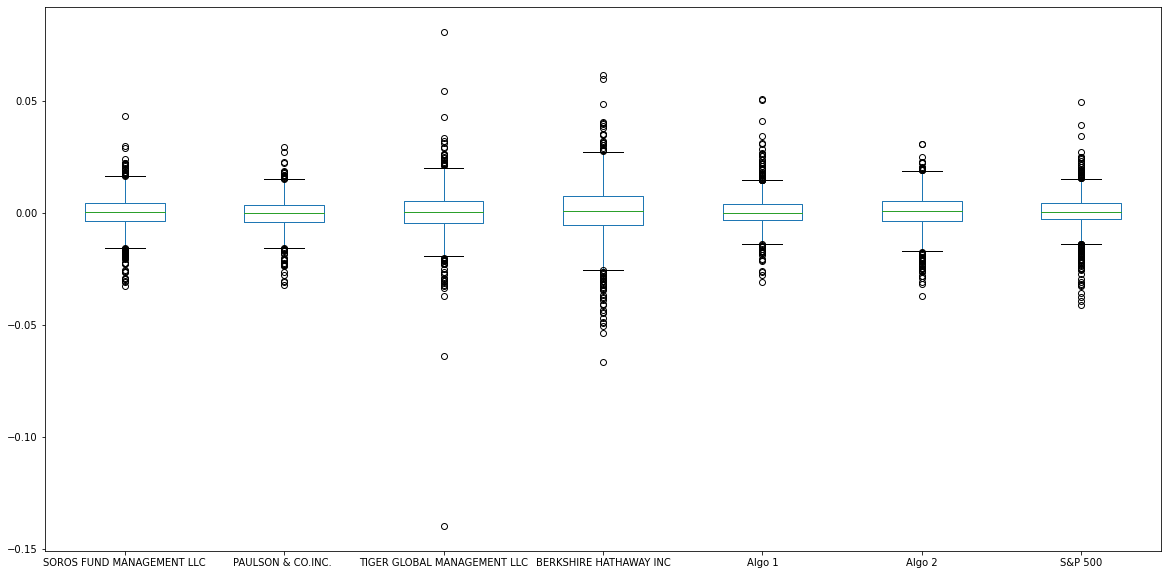

In [384]:
# Box plot to visually show risk
portfolio_returns.plot(kind='box', figsize=(20,10))

### Calculate Standard Deviations

In [385]:
# Calculate the daily standard deviations of all portfolios
portfolio_std = pd.DataFrame(portfolio_returns.std())
portfolio_std.columns=['STD']
portfolio_std

,STD
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
S&P 500,0.008554


### Determine which portfolios are riskier than the S&P 500

In [386]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = portfolio_std['STD']['S&P 500']
print(f"The Daily Standard Deviation of the S&P 500 is {round((sp500_std),6)}")
print('-'*50)

# Determine which portfolios are riskier than the S&P 500
portfolio_std.loc[portfolio_std['STD']>sp500_std]

The Daily Standard Deviation of the S&P 500 is 0.008554
--------------------------------------------------


,STD
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


Berkshire Hathaway is the riskiest portfolio

### Calculate the Annualized Standard Deviation

In [387]:
# Calculate the annualized standard deviation (252 trading days)
ann_std = portfolio_std * np.sqrt(252)
ann_std.columns = ['Annualized STD']
ann_std.head()

,Annualized STD
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling'}, xlabel='Date'>

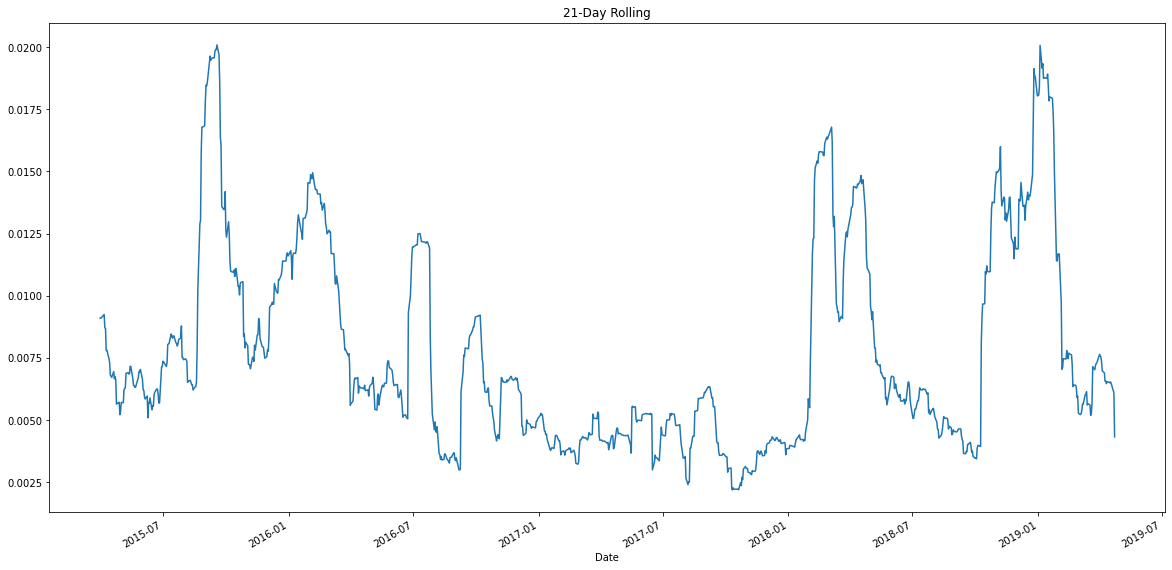

In [388]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
portfolio_rolling_std = portfolio_returns.rolling(window=21).std()

# Plot the rolling standard deviation
portfolio_rolling_std['S&P 500'].plot(title='21-Day Rolling', figsize=(20,10))


### Calculate and plot the correlation

In [389]:
# Calculate the correlation
correlation = portfolio_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

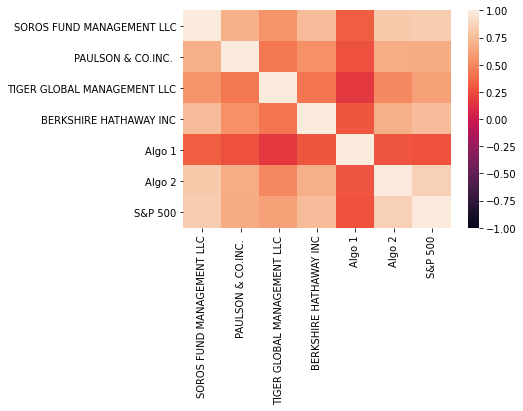

In [390]:
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

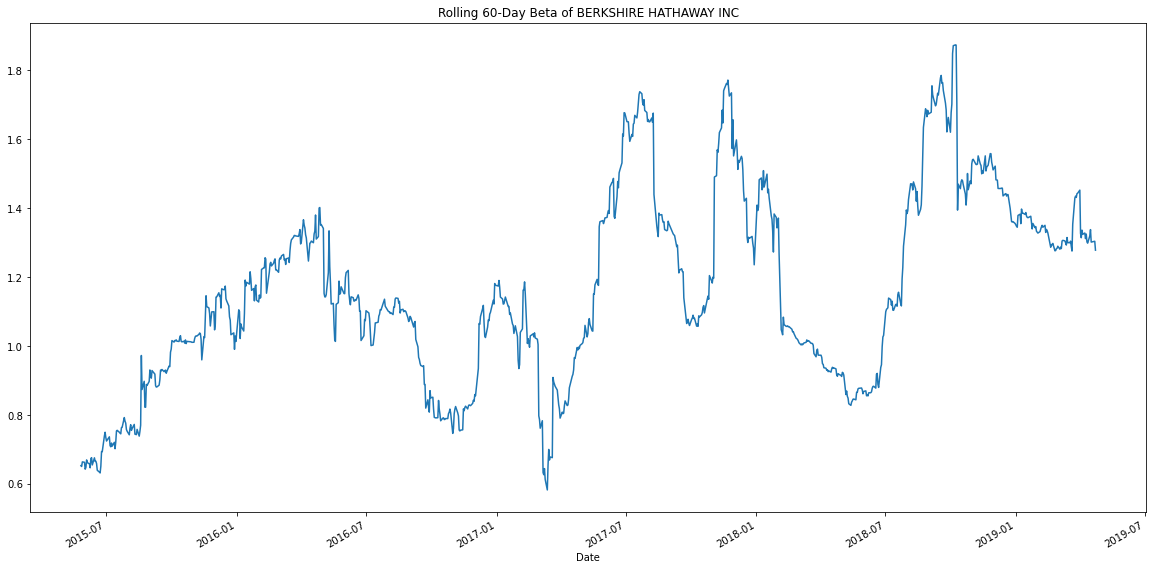

In [391]:
# Calculate covariance of a single portfolio
rolling_covariance_BH = portfolio_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(portfolio_returns['S&P 500'])


# Calculate variance of S&P 500
rolling_variance = portfolio_returns['S&P 500'].rolling(window=60).var()


# Computing beta
rolling_beta = rolling_covariance_BH / rolling_variance


# Plot beta trend
rolling_beta.plot(title='Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC', figsize=(20,10))


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [392]:
# Use `ewm` to calculate the rolling window
exponential_ma = portfolio_returns.ewm(halflife=21, adjust=False).mean()
exponential_ma.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,-0.001152,-0.004714,-0.000562,-0.006219,-0.002158,-0.000840,-0.004534
2015-03-05,-0.000984,-0.004428,-0.000467,-0.005798,-0.002119,-0.000673,-0.004348
2015-03-06,-0.001209,-0.004400,-0.000727,-0.006035,-0.002211,-0.001023,-0.004667
2015-03-09,-0.001151,-0.004120,-0.000514,-0.005893,-0.002316,-0.000947,-0.004387


<AxesSubplot:xlabel='Date'>

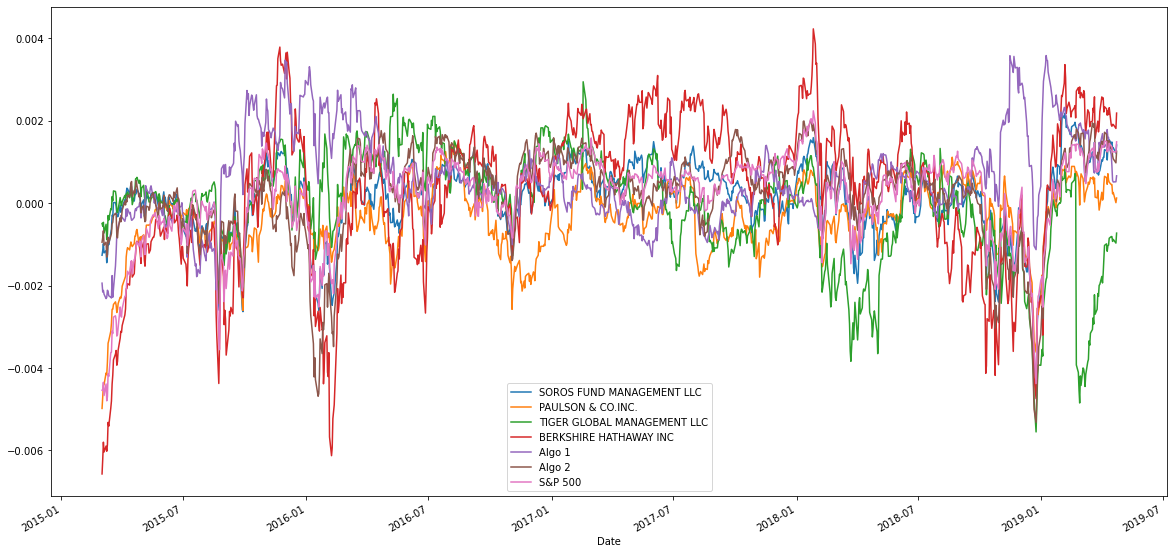

In [393]:
# plot ewm
exponential_ma.plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [394]:
# Annualized Sharpe Ratios
sharpe_ratios = (portfolio_returns.mean() * 252) / (portfolio_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

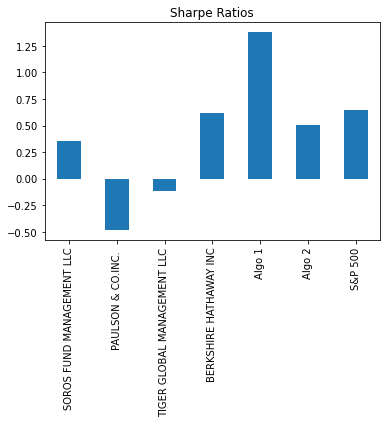

In [395]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.



Algo 1 had the greatest cummaltive return outperforming S&P 500 as well as the whales portfolios, Aglo 2 outperformed Soros Fund Management, Paulson & CO., Tiger Global Management but was outpermformed by the S&P 500 and Berkshire Hathaway.


This is also reflected in repsect to the Sharpe Ratios where Algo 1 had the highest sharpe ratio outperforming both the S&P 500 as well as the whales portfolios, essentially Algo 1 had more return per amount of risk.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [396]:
# Reading data from 1st stock
tsla_history = pd.read_csv("Resources/tsla_history.csv", index_col = "Date", parse_dates=True, infer_datetime_format=True)
tsla_history.head()

,Close
Date,
2018-05-01 16:00:00,59.98
2018-05-02 16:00:00,60.23
2018-05-03 16:00:00,56.89
2018-05-04 16:00:00,58.82
2018-05-07 16:00:00,60.55


In [397]:
# Reading data from 2nd stock
roku_history = pd.read_csv("Resources/roku_history.csv", index_col = "Date", parse_dates=True, infer_datetime_format=True)
roku_history.head()

,Close
Date,
2018-05-01 16:00:00,32.97
2018-05-02 16:00:00,33.36
2018-05-03 16:00:00,31.02
2018-05-04 16:00:00,31.55
2018-05-07 16:00:00,33.17


In [398]:
# Reading data from 3rd stock
fb_history = pd.read_csv("Resources/fb_history.csv", index_col = "Date", parse_dates=True, infer_datetime_format=True)
fb_history.head()

,Close
Date,
2018-05-01 16:00:00,173.86
2018-05-02 16:00:00,176.07
2018-05-03 16:00:00,174.02
2018-05-04 16:00:00,176.61
2018-05-07 16:00:00,177.97


In [399]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([tsla_history, roku_history, fb_history], axis=1, join='inner')
my_portfolio.head()

,Close,Close,Close
Date,,,
2018-05-01 16:00:00,59.98,32.97,173.86
2018-05-02 16:00:00,60.23,33.36,176.07
2018-05-03 16:00:00,56.89,31.02,174.02
2018-05-04 16:00:00,58.82,31.55,176.61
2018-05-07 16:00:00,60.55,33.17,177.97


In [400]:
# Reset Date index
my_portfolio.index = my_portfolio.index.normalize()
my_portfolio.head()

,Close,Close,Close
Date,,,
2018-05-01,59.98,32.97,173.86
2018-05-02,60.23,33.36,176.07
2018-05-03,56.89,31.02,174.02
2018-05-04,58.82,31.55,176.61
2018-05-07,60.55,33.17,177.97


I do not think this was covered in class, please see link below for the reference I used to remove the close time

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.normalize.html

In [401]:
# Reorganize portfolio data by having a column per symbol
my_portfolio.columns=['TSLA', 'ROKU', 'FB']
my_portfolio.head()

,TSLA,ROKU,FB
Date,,,
2018-05-01,59.98,32.97,173.86
2018-05-02,60.23,33.36,176.07
2018-05-03,56.89,31.02,174.02
2018-05-04,58.82,31.55,176.61
2018-05-07,60.55,33.17,177.97


In [402]:
# Calculate daily returns
daily_returns = my_portfolio.pct_change()

# Drop NAs
daily_returns.dropna(inplace=True)

# Display sample data
daily_returns.head()

,TSLA,ROKU,FB
Date,,,
2018-05-02,0.004168,0.011829,0.012711
2018-05-03,-0.055454,-0.070144,-0.011643
2018-05-04,0.033925,0.017086,0.014883
2018-05-07,0.029412,0.051347,0.007701
2018-05-08,-0.002642,-0.001507,0.005338


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [403]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_returns = daily_returns.dot(weights)


# Display sample data
my_returns.head()

Date
2018-05-02    0.009569
2018-05-03   -0.045747
2018-05-04    0.021965
2018-05-07    0.029486
2018-05-08    0.000396
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [404]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns = pd.concat([my_returns, portfolio_returns], axis=1, join='inner')
combined_returns.rename(columns={0:"My Portfolio Returns"}, inplace=True) 
combined_returns                      

,My Portfolio Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2018-05-02,0.009569,-0.007923,-0.011448,-0.019454,0.000131,0.005558,0.001319,-0.007206
2018-05-03,-0.045747,-0.005584,-0.010606,0.008883,0.000822,0.008960,-0.002614,-0.002254
2018-05-04,0.021965,0.013363,0.006909,0.042637,0.008794,0.000648,0.008404,0.012811
2018-05-07,0.029486,0.008047,0.002994,0.010428,0.008954,0.006150,0.003798,0.003458
2018-05-08,0.000396,-0.003793,-0.010821,-0.001354,-0.000946,-0.001733,0.001310,-0.000266
...,...,...,...,...,...,...,...,...
2019-04-16,0.015790,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.010999,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001997,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [405]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns.dropna(inplace=True)
combined_returns.head()


,My Portfolio Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2018-05-02,0.009569,-0.007923,-0.011448,-0.019454,0.000131,0.005558,0.001319,-0.007206
2018-05-03,-0.045747,-0.005584,-0.010606,0.008883,0.000822,0.008960,-0.002614,-0.002254
2018-05-04,0.021965,0.013363,0.006909,0.042637,0.008794,0.000648,0.008404,0.012811
2018-05-07,0.029486,0.008047,0.002994,0.010428,0.008954,0.006150,0.003798,0.003458
2018-05-08,0.000396,-0.003793,-0.010821,-0.001354,-0.000946,-0.001733,0.001310,-0.000266


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [406]:
# Calculate the annualized `std`
combined_ann_std = combined_returns.std() * np.sqrt(252)
combined_ann_std

My Portfolio Returns           0.409836
SOROS FUND MANAGEMENT LLC      0.145918
PAULSON & CO.INC.              0.117386
TIGER GLOBAL MANAGEMENT LLC    0.234438
BERKSHIRE HATHAWAY INC         0.243474
Algo 1                         0.132099
Algo 2                         0.137833
S&P 500                        0.150905
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

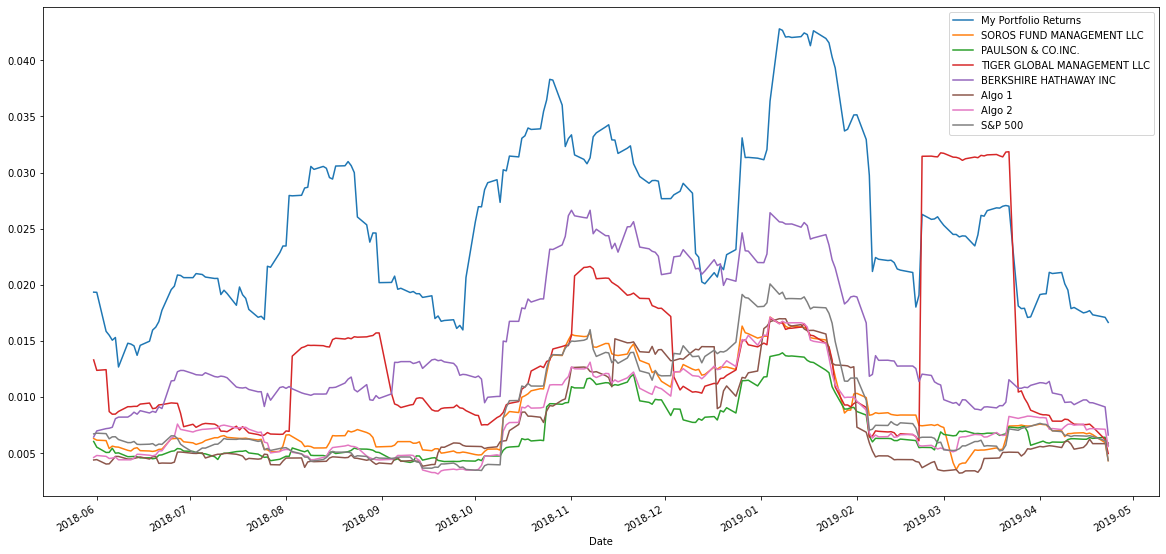

In [407]:
# Calculate rolling standard deviation
combined_rolling_std = combined_returns.rolling(window=21).std()

# Plot rolling standard deviation
combined_rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

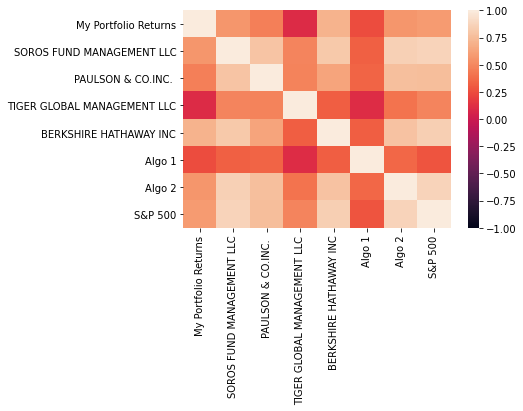

In [408]:
# Calculate and plot the correlation
combined_correlation = combined_returns.corr()
sns.heatmap(combined_correlation,vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio Returns'}, xlabel='Date'>

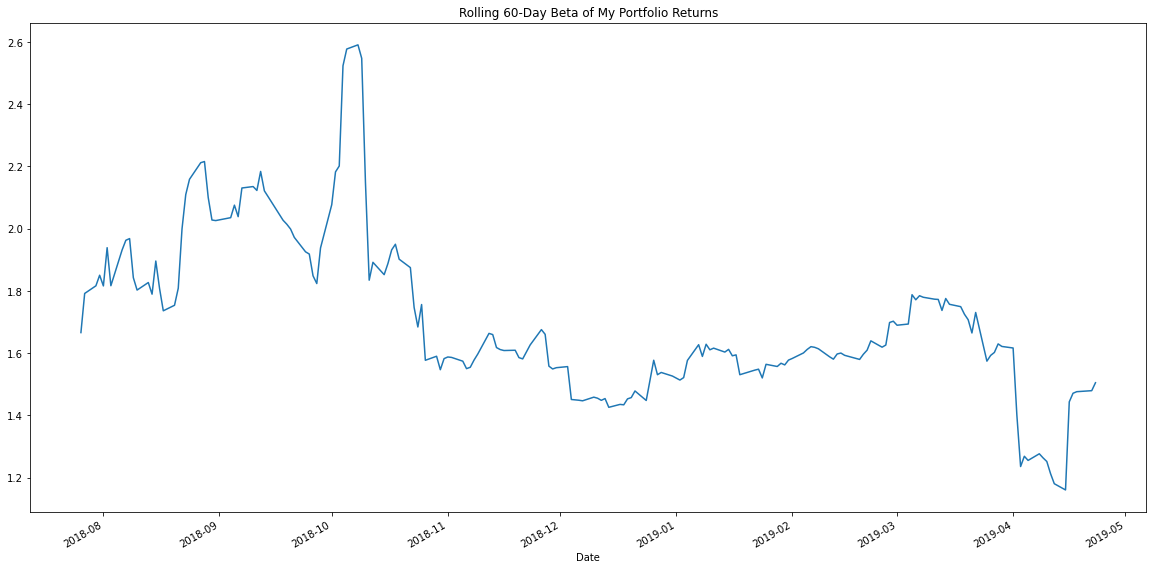

In [410]:
# Calculate and plot Beta
combined_roll_cov_my_portfolio = combined_returns['My Portfolio Returns'].rolling(window=60).cov(combined_returns['S&P 500'])
combined_roll_var = combined_returns['S&P 500'].rolling(window=60).var()
combined_roll_beta = combined_roll_cov_my_portfolio / combined_roll_var
combined_roll_beta.plot(title='Rolling 60-Day Beta of My Portfolio Returns', figsize=(20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [411]:
# Calculate Annualzied Sharpe Ratios
combined_sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
combined_sharpe_ratios

My Portfolio Returns           0.883939
SOROS FUND MANAGEMENT LLC      0.470071
PAULSON & CO.INC.              0.211396
TIGER GLOBAL MANAGEMENT LLC   -0.764089
BERKSHIRE HATHAWAY INC         0.241674
Algo 1                         2.188740
Algo 2                         0.241649
S&P 500                        0.756139
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

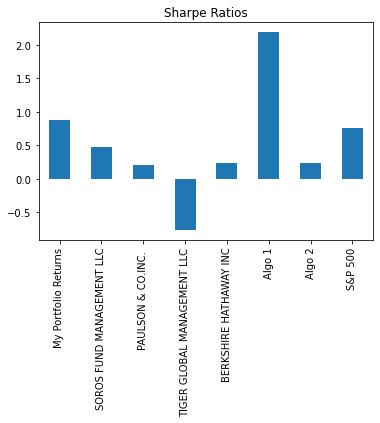

In [412]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

<AxesSubplot:xlabel='Date'>

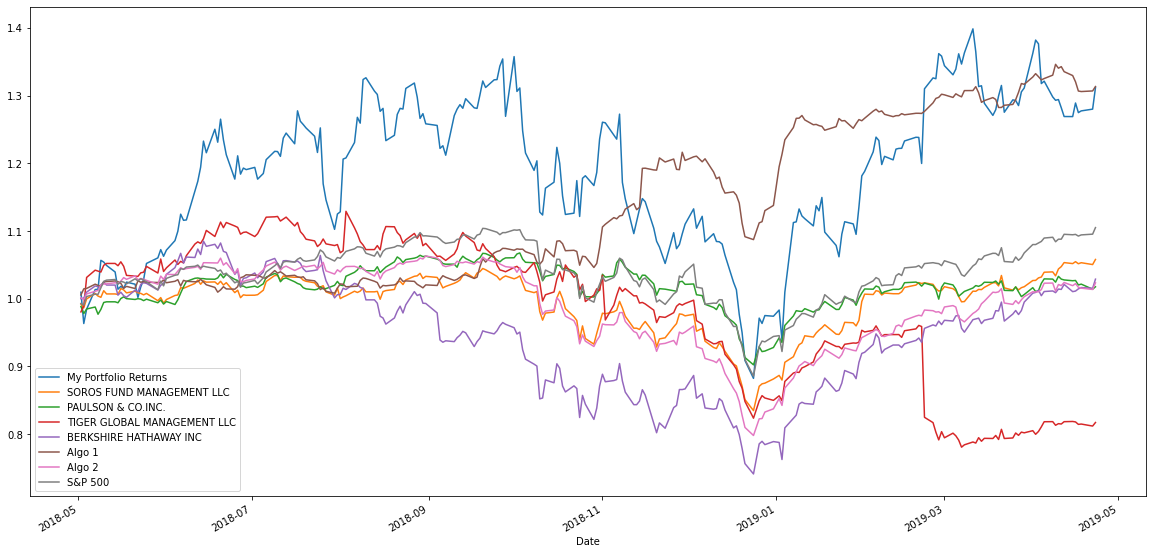

In [413]:
cumulative_returns = (1 + combined_returns).cumprod()
cumulative_returns.plot(figsize=(20,10))

### How does your portfolio do?


According to the Sharpe Ratios my porfolio outperformed the whale portfolios, the S&P 500, and Algo 2, but fell quite short compared to Algo 1. 

Per the cumulative returns as shown above my portfolio had around a 14% return and outerperformed all but Algo 1.